## THE SPARKS FOUNDATION INTERNSHIP

# Task 6: Prediction using Decision Tree Algorithm


# Author : Jyoti Pandey

### **Problem Statement**: Create the Decision Tree classifier and visualize it graphically.

**The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

## *Importing the libraries* 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree

### ***Importing the dataset***

In [2]:
data = pd.read_csv('Iris.csv')
print("Data imported successfully!")

data.head(5)

Data imported successfully!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail(5) #print last 5 entries

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## *Reading the dataset*

***To check the no. of rows and columns***

In [4]:
data.shape

(150, 6)

***We can use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset***

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


***Checking if there are any NULL values***

In [6]:
data.isnull == True

False

In [7]:
#if true in above case, checking the null count for each column
data.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

*There are no NULL values in the Dataset.*

***To print the full summary of the dataframe .***

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
#To check the datatype
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

***Checking the correlation***

In [10]:
data.drop('Id',inplace=True,axis=1) #droping the ID column 
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# *Visualizing the dataset*

***Correlation using heatmap***

<AxesSubplot:>

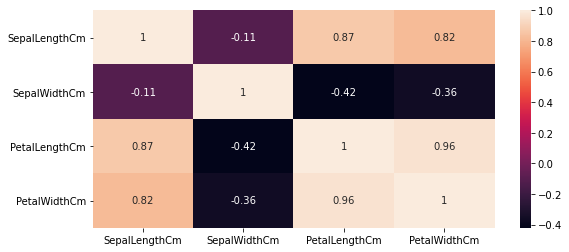

In [11]:
plt.figure(figsize=(9,4))
# annot = True to print the values inside the square
sns.heatmap(data.corr(),annot=True,)
# annot = True to print the values inside the square

***Setting labels for species data***

In [12]:
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### ***Visualizing data with pair plots***

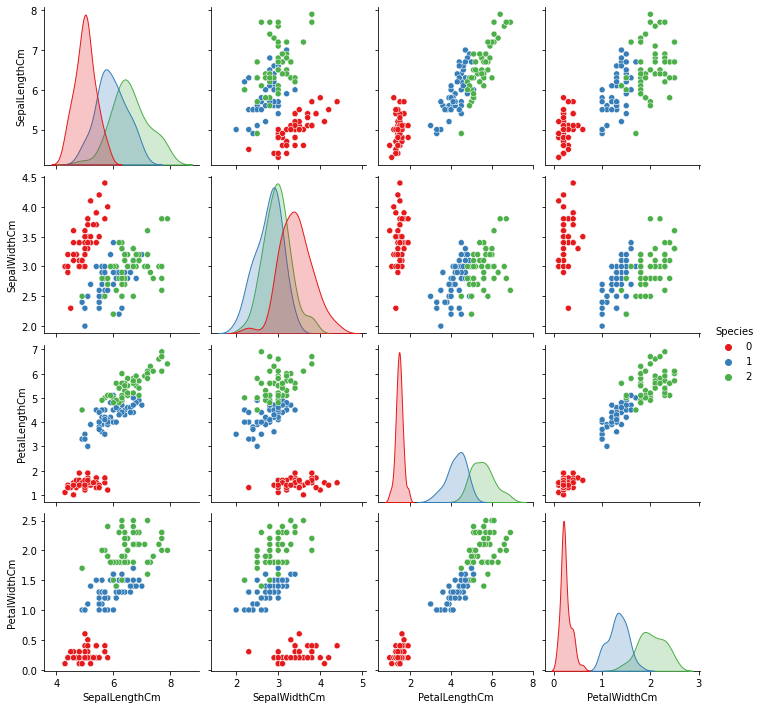

In [13]:
sns.pairplot(data,hue='Species',palette='Set1')

***It can be inferred from the plot that Iris-setosa forms a separate cluster, as compared to the other two species, Iris-versicolor and Iris-virginica which form closely placed clusters.***

***Representing species in form of violin chart***

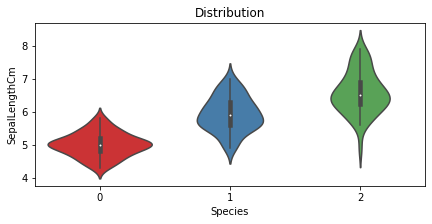

In [14]:
plt.figure(figsize = (7,3))
sns.violinplot(x='Species',y='SepalLengthCm',data=data,palette = 'Set1')
plt.title('Distribution')
plt.show()

***Dividing into dependent variable and independent variable***

In [15]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [16]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## ***Training the Model***

***Splitting the data into train and test set***

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) 
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print("Training Complete.")

Training Complete.


### ***Prediction and Comparision***

In [19]:
y_pred = classifier.predict(X_test)

***Making the confusion Matrix***

In [20]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64)

***Making Classification Report***

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



***Finding Accuracy Score***

In [22]:
accuracy_score(y_test,y_pred)

0.9777777777777777

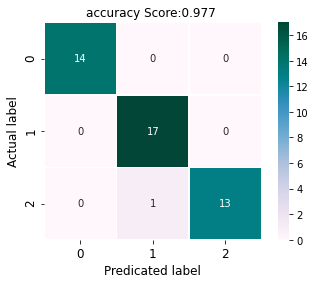

In [23]:
#Heatmap
accuracy_score(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',linewidths=0.5,square=True,cmap="PuBuGn")
plt.title("accuracy Score:0.977 ",fontsize=12)
plt.xlabel("Predicated label",fontsize=12)
plt.ylabel("Actual label",fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

***We have got around 98% Accuracy For This Model.***

### ***Printing text visual of decision tree***

In [24]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.60
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.60
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



### *Visualizing decision tree*

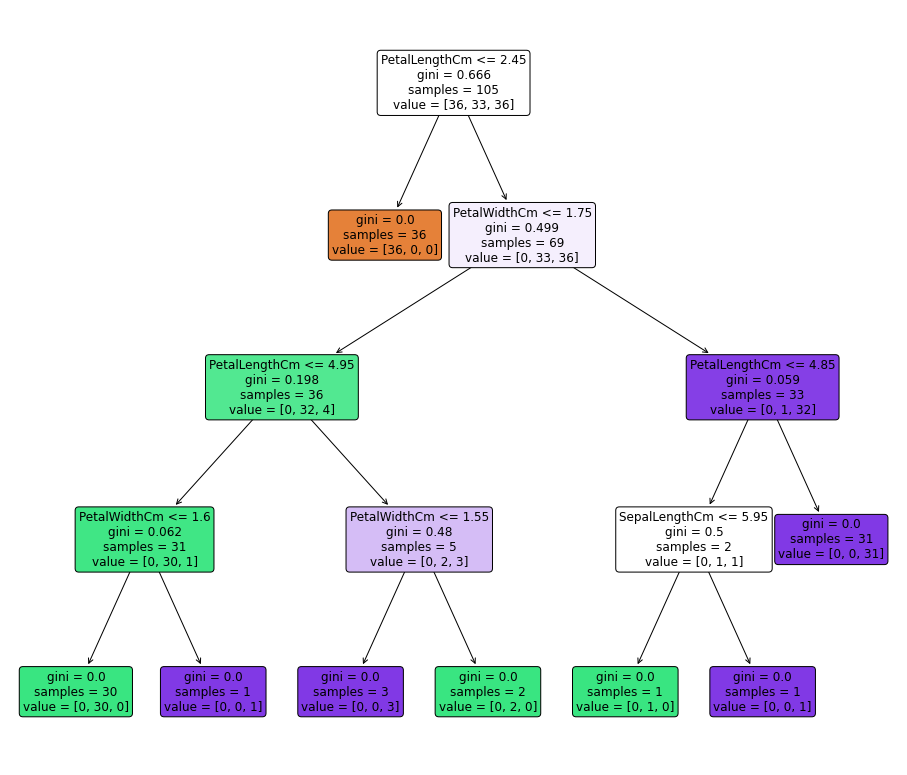

In [25]:
plt.figure(figsize=(16,14))
dtree= tree.plot_tree(classifier, feature_names = x.columns , fontsize = 12 , filled = True, rounded=True)


## ***Prediction On Randomly Created Data.***

In [26]:
new_data =  pd.DataFrame({'SepalLengthCm':[3.1,2.4,4.6,1.8,5.2],
                         'SepalWidthCm':[4.3,6.1,2.4,3.3,5.1],
                         'PetalLengthCm':[2.2,3.3,4.4,3.3,2.2],
                         'PetalWidthCm':[0.8,0.7,1.4,1.6,0.9]})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.1,4.3,2.2,0.8
1,2.4,6.1,3.3,0.7
2,4.6,2.4,4.4,1.4
3,1.8,3.3,3.3,1.6
4,5.2,5.1,2.2,0.9


In [27]:
new_predict = classifier.predict(new_data)

In [28]:
new_data['Predicted Species'] = new_predict
new_data['Predicted Species'] = new_data['Predicted Species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Species
0,3.1,4.3,2.2,0.8,Iris-setosa
1,2.4,6.1,3.3,0.7,Iris-versicolor
2,4.6,2.4,4.4,1.4,Iris-versicolor
3,1.8,3.3,3.3,1.6,Iris-versicolor
4,5.2,5.1,2.2,0.9,Iris-setosa


***Here in the Predicted Species column, we can see the predictions on our randomly created data.***

***Hence, decision tree algorithm has been successfully created, visualised and prediction on new data was made with the accuracy of 97%.***

***Task Completed***